In [7]:
# import modules
import pandas as pd
# import datasets
monthly_deaths = pd.read_csv('datasets/monthly_deaths.csv', parse_dates = ['date'])
yearly_deaths = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')
print(monthly_deaths.head(), end='\n ###################### \n')
print(yearly_deaths.head())

        date  births  deaths
0 1841-01-01     254      37
1 1841-02-01     239      18
2 1841-03-01     277      12
3 1841-04-01     255       4
4 1841-05-01     255       2
 ###################### 
   year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1


In [18]:
# modifying datasets for beter grouping and ploting
monthly_deaths['year'] = monthly_deaths['date'].dt.year
grouped_month = monthly_deaths.groupby('year').agg('sum', numeric_only = True).reset_index()
grouped_year = yearly_deaths.groupby('year').agg('sum', numeric_only = True).reset_index()
print(grouped_month, end = '\n #### \n')
print(grouped_year)

   year  births  deaths
0  1841    2576     185
1  1842    3067     521
2  1843    2871     274
3  1844    2918     260
4  1845    3253     241
5  1846    3352     459
6  1847    3375     176
7  1848    3556      45
8  1849    1198      41
 #### 
   year  births  deaths  proportion_deaths
0  1841    5478     323           0.113280
1  1842    5946     720           0.233559
2  1843    5799     438           0.149418
3  1844    6113     328           0.105361
4  1845    6733     307           0.089379
5  1846    7764     564           0.142434


In [19]:
# adding proportion of deaths to de dataframes
grouped_month['proportion_deaths'] = grouped_month['deaths'] / grouped_month['births']
grouped_year['proportion_deaths'] = yearly_deaths['deaths'] / yearly_deaths['births']
print(grouped_month.head(), end='\n ###################### \n')
print(grouped_year.head())

   year  births  deaths  proportion_deaths
0  1841    2576     185           0.071817
1  1842    3067     521           0.169873
2  1843    2871     274           0.095437
3  1844    2918     260           0.089102
4  1845    3253     241           0.074085
 ###################### 
   year  births  deaths  proportion_deaths
0  1841    5478     323           0.078063
1  1842    5946     720           0.157591
2  1843    5799     438           0.089542
3  1844    6113     328           0.082357
4  1845    6733     307           0.069015


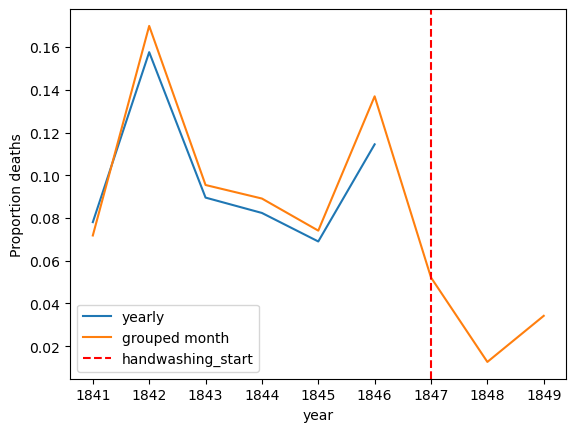

In [25]:
# ploting the yearly deaths proportions
import matplotlib.pyplot as plt
%matplotlib inline

# ploting
ax = grouped_year.plot(x = 'year', y = 'proportion_deaths', label = 'yearly')
grouped_month.plot(x = 'year', y = 'proportion_deaths', ax = ax, ylabel = 'Proportion deaths', label = 'grouped month')
# add point to start of handwashing
handwashing_start = pd.to_datetime('1847-06-01')
ax.axvline(x=handwashing_start.year, color='red', linestyle='--', label = 'handwashing_start')
ax.legend()